In [4]:
import numpy as np
from scipy.stats import chisquare, poisson
from collections import Counter


student_counts_15days = [
    85, 95, 112, 93, 114, 125, 105, 125, 105, 116, 124, 133, 121, 114, 107,
    127, 99, 109, 108, 111, 123, 116, 103, 109, 85, 107, 109, 108, 104, 103,
    111, 86, 104, 93, 113, 96, 102, 71, 91, 74, 84, 103, 80, 95, 80, 89, 79,
    95, 69, 74, 81, 91, 75, 72, 72, 95, 81, 84, 74, 78, 73, 79, 82, 96, 88,
    78, 84, 70, 63, 72, 83, 68, 76, 69, 84, 69, 69, 86, 93, 90, 92, 77, 87,
    81, 81, 97, 93, 84, 83, 86, 115, 83, 83, 84, 81, 79, 123, 106, 84, 115,
    100, 108, 100, 113, 106, 136, 115, 130, 116, 110, 98, 79, 93, 101, 90,
    101, 104, 97, 106, 96, 30
]

# Convert to per-day per-minute counts
counts_per_day = [round(x / 15) for x in student_counts_15days]

# observed frequency table
freq_table = Counter(counts_per_day)
observed = []
expected = []
total_intervals = len(counts_per_day)

# mean arrival rate (λ)
λ = np.mean(counts_per_day)

# Calculate expected frequencies from Poisson distribution
min_k = min(freq_table)
max_k = max(freq_table)

# Calculate probabilities for the observed range of k
probabilities = [poisson.pmf(k, mu=λ) for k in range(min_k, max_k + 1)]
sum_of_probabilities = sum(probabilities)

# frequency table
print(f"\n{'k (students/min)':>18} | {'Observed':>8} | {'Expected':>10}")
print("-" * 42)

for i, k in enumerate(range(min_k, max_k + 1)):
    obs = freq_table.get(k, 0)
    prob = probabilities[i]
    exp = (prob / sum_of_probabilities) * total_intervals
    observed.append(obs)
    expected.append(exp)
    print(f"{k:>18} | {obs:>8} | {exp:>10.2f}")




# chi-square test
# We use ddof=1 because we are estimating the mean (lambda) from the data.
# This means we lose one degree of freedom.
chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected, ddof=1)

print(f"Mean arrival rate per minute (λ): {λ:.2f}")
print("Chi-square statistic:", chi_stat)
print("p-value:", p_val)

if p_val > 0.05:
    print(" The data is consistent with a Poisson distribution.")
else:
    print(" The data does NOT fit a Poisson distribution.")


  k (students/min) | Observed |   Expected
------------------------------------------
                 2 |        1 |       5.02
                 3 |        0 |      10.53
                 4 |        1 |      16.58
                 5 |       31 |      20.88
                 6 |       38 |      21.91
                 7 |       30 |      19.71
                 8 |       17 |      15.52
                 9 |        3 |      10.86
Mean arrival rate per minute (λ): 6.30
Chi-square statistic: 56.294855750186585
p-value: 2.5375158414553655e-10
 The data does NOT fit a Poisson distribution.


NHPP

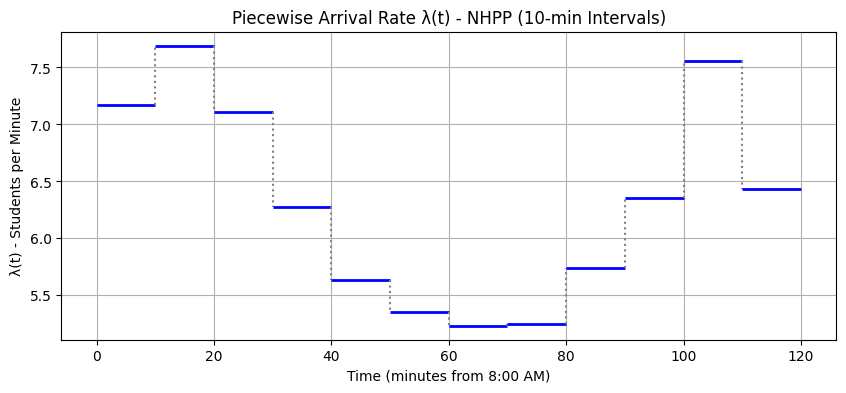

Expected number of students from 8:00 to 10:00 = 757.9

--- Shuttle Planning ---
8:00 - 8:10 → 71.7 students → 4 shuttle(s)  High Demand
8:10 - 8:20 → 76.9 students → 5 shuttle(s)  High Demand
8:20 - 8:30 → 71.1 students → 4 shuttle(s)  High Demand
8:30 - 8:40 → 62.7 students → 4 shuttle(s)  High Demand
8:40 - 8:50 → 56.3 students → 4 shuttle(s) 
8:50 - 9:00 → 53.5 students → 3 shuttle(s) 
9:00 - 9:10 → 52.3 students → 3 shuttle(s) 
9:10 - 9:20 → 52.5 students → 3 shuttle(s) 
9:20 - 9:30 → 57.4 students → 4 shuttle(s) 
9:30 - 9:40 → 63.5 students → 4 shuttle(s)  High Demand
9:40 - 9:50 → 75.6 students → 5 shuttle(s)  High Demand
9:50 - 10:00 → 64.3 students → 4 shuttle(s)  High Demand


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 10-minute average arrival rates

lambda_rates = [7.166666667, 7.690909091, 7.113333333, 6.273333333, 5.63030303, 5.353333333, 5.233333333, 5.246666667, 5.74, 6.353333333, 7.56, 6.433333333]
interval_duration = 10  # minutes
time_bins = [i * interval_duration for i in range(len(lambda_rates) + 1)]  # [0, 10, 20, ..., 120]

# Plot λ(t) as a step function
plt.figure(figsize=(10, 4))
for i in range(len(lambda_rates)):
    plt.hlines(lambda_rates[i], time_bins[i], time_bins[i+1], colors='blue', lw=2)
    plt.vlines(time_bins[i+1], lambda_rates[i], lambda_rates[i+1] if i+1 < len(lambda_rates) else lambda_rates[i], colors='gray', linestyles='dotted')

plt.title("Piecewise Arrival Rate λ(t) - NHPP (10-min Intervals)")
plt.xlabel("Time (minutes from 8:00 AM)")
plt.ylabel("λ(t) - Students per Minute")
plt.grid(True)
plt.show()

# Estimate expected total arrivals from t1 to t2
def expected_arrivals(t1, t2):
    total = 0
    for i in range(len(lambda_rates)):
        start = time_bins[i]
        end = time_bins[i+1]
        overlap = max(0, min(t2, end) - max(t1, start))
        total += lambda_rates[i] * overlap
    return total

# estimate number of students arriving between 8:00 and 9:30 (i.e., 0 to 90 mins)
expected_students = expected_arrivals(0, 120)
print(f"Expected number of students from 8:00 to 10:00 = {expected_students:.1f}")

shuttle_capacity = 18  # students per shuttle

print("\n--- Shuttle Planning ---")
for i, rate in enumerate(lambda_rates):
    expected_students = rate * 10  # per 10-min interval
    shuttles_needed = int(np.ceil(expected_students / shuttle_capacity))

    status = ""
    if rate > 6:
        status = " High Demand"
    elif rate < 3:
        status = " Idle Window"

    print(f"{8 + i//6}:{(i%6)*10:02} - {8 + (i+1)//6}:{((i+1)%6)*10:02} → "
          f"{expected_students:.1f} students → {shuttles_needed} shuttle(s) {status}")






K_S TEST

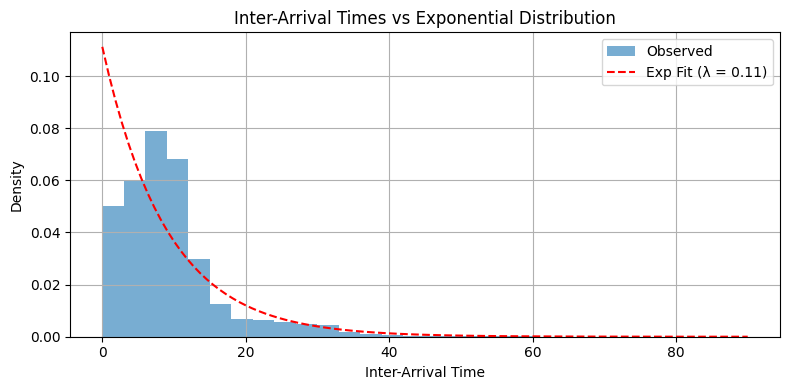

Mean inter-arrival time: 8.9928
Estimated λ: 0.1112
K-S Statistic: 0.1676
p-value: 0.0000
 Inter-arrival times do NOT follow an exponential distribution.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest


df = pd.read_excel("inter_arrival_times.xlsx")
inter_arrival_times = df["InterArrivalTime"].dropna().values


mean_time = np.mean(inter_arrival_times)
λ = 1 / mean_time

# Histogram + exponential curve
plt.figure(figsize=(8, 4))
plt.hist(inter_arrival_times, bins=30, density=True, alpha=0.6, label='Observed')
x = np.linspace(0, max(inter_arrival_times), 100)
plt.plot(x, expon.pdf(x, scale=mean_time), 'r--', label=f'Exp Fit (λ = {λ:.2f})')
plt.title("Inter-Arrival Times vs Exponential Distribution")
plt.xlabel("Inter-Arrival Time")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Kolmogorov-Smirnov (K-S) Test


D, p_value = kstest(inter_arrival_times, 'expon', args=(np.min(inter_arrival_times), mean_time))

print(f"Mean inter-arrival time: {mean_time:.4f}")
print(f"Estimated λ: {λ:.4f}")
print(f"K-S Statistic: {D:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print(" Inter-arrival times follow an exponential distribution.")
else:
    print(" Inter-arrival times do NOT follow an exponential distribution.")


MEAN AND VARIANCE TEST

In [7]:
import numpy as np

arrival_counts = [
    71.67, 76.91, 71.13, 62.73, 56.30, 53.53,
    52.33, 52.47, 57.4, 63.53, 75.6, 64.33
]

# mean
mean_count = np.mean(arrival_counts)

# variance
variance = np.var(arrival_counts)

# comparision
print(f"Mean = {mean_count:.2f}")
print(f"Variance = {variance:.2f}")

if abs(mean_count - variance) / mean_count < 0.1:
    print(" Mean ≈ Variance → Poisson assumption plausible.")
elif variance > mean_count:
    print(" Overdispersion detected → Consider Negative Binomial distribution.")
else:
    print(" Underdispersion detected → Poisson may not be appropriate.")


Mean = 63.16
Variance = 73.83
 Overdispersion detected → Consider Negative Binomial distribution.


Questions

In [8]:
from scipy.stats import poisson


k = 40         # number of students
t = 5          # time in minutes

# Define arrival rates (students/minute)
arrival_rates = {
    "Peak (λ=7.69)": 7.69,
    "Normal (λ=6.3)": 6.3,
    "Off-Peak (λ=4.75)": 4.75
}

# Calculate probabilities
for label, λ in arrival_rates.items():
    λt = λ * t
    prob = poisson.pmf(k, λt)
    print(f"{label}: P(X=40 in 5 mins) = {prob:.6f}")


Peak (λ=7.69): P(X=40 in 5 mins) = 0.061036
Normal (λ=6.3): P(X=40 in 5 mins) = 0.021903
Off-Peak (λ=4.75): P(X=40 in 5 mins) = 0.000632


Expected Number of students in t seconds

In [9]:
arrival_rates = {
    "Peak (λ=7.69)": 7.69,
    "Normal (λ=6.3)": 6.3,
    "Off-Peak (λ=4.75)": 4.75
}

times = [5, 10, 15]

for label, λ in arrival_rates.items():
    print(f"\n{label}")
    for t in times:
        expected = λ * t
        print(f"  Expected students in {t} min: {expected:.1f}")



Peak (λ=7.69)
  Expected students in 5 min: 38.5
  Expected students in 10 min: 76.9
  Expected students in 15 min: 115.4

Normal (λ=6.3)
  Expected students in 5 min: 31.5
  Expected students in 10 min: 63.0
  Expected students in 15 min: 94.5

Off-Peak (λ=4.75)
  Expected students in 5 min: 23.8
  Expected students in 10 min: 47.5
  Expected students in 15 min: 71.2


In [21]:
import numpy as np
import pandas as pd
from scipy.stats import kstest

df2 = pd.read_excel("collation sheet.xlsx")
df2['Arrival time'] = pd.to_datetime(df2['Arrival time'], format='%H:%M:%S')
base_time = pd.to_datetime('08:00:00', format='%H:%M:%S')
df2['SecondsFrom8AM'] = (df2['Arrival time'] - base_time).dt.total_seconds()

event_times = df2['SecondsFrom8AM'].sort_values().to_numpy()


# Stepwise lambda(t) values for each 10-minute interval (in students per minute)
lambda_rates = [7.17, 7.69, 7.11, 6.27, 5.63, 5.35, 5.23, 5.25, 5.74, 6.35, 7.56, 6.43]
interval_length = 600
intervals = [(i * interval_length, (i + 1) * interval_length) for i in range(len(lambda_rates))]

# Convert to lambda per second
lambda_per_second = [rate / 60 for rate in lambda_rates]

# Compute rescaled inter-arrival times
rescaled_times = []
for i in range(1, len(event_times)):
    t_start = event_times[i - 1]
    t_end = event_times[i]
    tau = 0

    for (start, end), lam in zip(intervals, lambda_per_second):
        if t_end <= start:
            break
        overlap_start = max(start, t_start)
        overlap_end = min(end, t_end)
        if overlap_end > overlap_start:
            tau += lam * (overlap_end - overlap_start)

    rescaled_times.append(tau)

# Apply K-S test for exponential(1)
D, p_value = kstest(rescaled_times, 'expon')

print(f"KS Statistic: {D:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print(" Rescaled times follow Exponential(1): NHPP is plausible.")
else:
    print(" Rescaled times do NOT follow Exponential(1): NHPP assumption may be invalid.")

KS Statistic: 0.7481
p-value: 0.0000
 Rescaled times do NOT follow Exponential(1): NHPP assumption may be invalid.


In [22]:
print("Number of rescaled inter-arrival times:", len(rescaled_times))
print("Sample rescaled values:", rescaled_times[:10])


Number of rescaled inter-arrival times: 10459
Sample rescaled values: [np.float64(0.1195), 0, np.float64(0.1195), 0, 0, np.float64(0.1195), np.float64(0.239), np.float64(0.1195), np.float64(0.1195), 0]


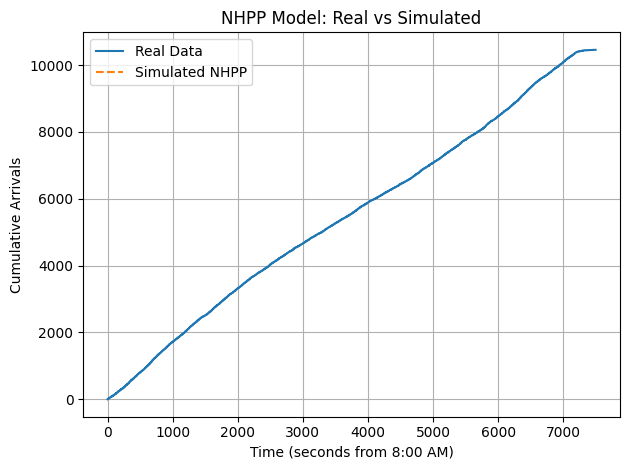

In [23]:
import matplotlib.pyplot as plt

def simulate_nhpp(lambda_rates, interval_length, total_time):
    arrival_times = []
    current_time = 0
    for lam in lambda_rates:
        lam_per_sec = lam / 60
        interval_end = current_time + interval_length
        while current_time < interval_end:
            u = np.random.uniform()
            inter_arrival = -np.log(u) / lam_per_sec
            current_time += inter_arrival
            if current_time < interval_end:
                arrival_times.append(current_time)
    return arrival_times

# Simulate 1 NHPP path
simulated = simulate_nhpp(lambda_rates, 0, 7200)  # total time = 2 hours = 7200s

# Plot real vs simulated cumulative arrivals
plt.step(np.sort(event_times), range(1, len(event_times)+1), label="Real Data")
plt.step(np.sort(simulated), range(1, len(simulated)+1), label="Simulated NHPP", linestyle='--')
plt.xlabel("Time (seconds from 8:00 AM)")
plt.ylabel("Cumulative Arrivals")
plt.title("NHPP Model: Real vs Simulated")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
print("First 10 event times (real):", event_times[:10])
print("Min time:", np.min(event_times))
print("Max time:", np.max(event_times))


First 10 event times (real): [0. 1. 1. 2. 2. 2. 3. 5. 6. 7.]
Min time: 0.0
Max time: 7497.0
